<a href="https://colab.research.google.com/github/NikuDubenco/DS-Unit-2-Classification-1/blob/master/Nicolae_Dubenco_log_reg_cat_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing and read data

import pandas as pd
train_features = pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P')
train_labels = pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f')
test_features = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')
train_features.shape, train_labels.shape, test_features.shape, sample_submission.shape

((59400, 40), (59400, 2), (14358, 40), (14358, 2))

In [10]:
train_features.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [3]:
train_features.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [9]:
len(train_features[train_features['population']==0])

21381

In [11]:
len(train_features[train_features['num_private']==0])

58643

In [5]:
train_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [9]:
train_features.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,59400,1,GeoData Consultants Ltd,59400
public_meeting,56066,2,True,51011
permit,56344,2,True,38852
source_class,59400,3,groundwater,45794
management_group,59400,5,user-group,52490
quantity_group,59400,5,enough,33186
quantity,59400,5,enough,33186
waterpoint_type_group,59400,6,communal standpipe,34625
quality_group,59400,6,good,50818
payment_type,59400,7,never pay,25348


#### Drop a few columns that seem not to give much informatoin, those that double information and create new DataFrame: train_features1

In [3]:
train_features1 = train_features[['id', 'amount_tsh', 'date_recorded', 'gps_height',
                                 'longitude', 'latitude', 'num_private',
                                 'basin', 'region_code', 'district_code', 
                                 'population',
                                 'scheme_management', 'permit', 'construction_year',
                                 'extraction_type_group', 'extraction_type_class',
                                 'management', 'management_group', 'payment_type',
                                 'quality_group', 'quantity_group',
                                 'source_type', 'source_class',
                                 'waterpoint_type_group']]
train_features1.head()

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,basin,region_code,district_code,population,scheme_management,permit,construction_year,extraction_type_group,extraction_type_class,management,management_group,payment_type,quality_group,quantity_group,source_type,source_class,waterpoint_type_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,0,Lake Nyasa,11,5,109,VWC,False,1999,gravity,gravity,vwc,user-group,annually,good,enough,spring,groundwater,communal standpipe
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,0,Lake Victoria,20,2,280,Other,True,2010,gravity,gravity,wug,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,0,Pangani,21,4,250,VWC,True,2009,gravity,gravity,vwc,user-group,per bucket,good,enough,dam,surface,communal standpipe
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,0,Ruvuma / Southern Coast,90,63,58,VWC,True,1986,submersible,submersible,vwc,user-group,never pay,good,dry,borehole,groundwater,communal standpipe
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,0,Lake Victoria,18,1,0,NaN,True,0,gravity,gravity,other,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe


#### Check how many zeros are in every columns. Sometime this zeros means NaN

In [4]:
features =  ['id', 'amount_tsh', 'date_recorded', 'gps_height',
             'longitude', 'latitude', 'num_private',
             'basin', 'region_code', 'district_code', 
             'population',
             'scheme_management', 'permit', 'construction_year',
             'extraction_type_group', 'extraction_type_class',
             'management', 'management_group', 'payment_type',
             'quality_group', 'quantity_group',
             'source_type', 'source_class',
             'waterpoint_type_group']
for feature in features:
  print(feature, '\n',
       'value equal zero =>>', len(train_features1[train_features1[feature]==0]),
       '\n', '--------' * 3)

id 
 value equal zero =>> 1 
 ------------------------
amount_tsh 
 value equal zero =>> 41639 
 ------------------------
date_recorded 
 value equal zero =>> 0 
 ------------------------
gps_height 
 value equal zero =>> 20438 
 ------------------------
longitude 
 value equal zero =>> 1812 
 ------------------------
latitude 
 value equal zero =>> 0 
 ------------------------
num_private 
 value equal zero =>> 58643 
 ------------------------
basin 
 value equal zero =>> 0 
 ------------------------
region_code 
 value equal zero =>> 0 
 ------------------------
district_code 
 value equal zero =>> 23 
 ------------------------
population 
 value equal zero =>> 21381 
 ------------------------
scheme_management 
 value equal zero =>> 0 
 ------------------------
permit 
 value equal zero =>> 17492 
 ------------------------
construction_year 
 value equal zero =>> 20709 
 ------------------------
extraction_type_group 
 value equal zero =>> 0 
 ------------------------
extraction_typ

In [26]:
train_features1['num_private'].unique()

array([   0,   39,    5,   45,    6,    3,  698,   32,   15,    7,   25,
        102,    1,   93,   14,   34,  120,   17,  213,   47,    8,   41,
         80,  141,   20,   35,  131,    4,   22,   11,   87,   61,   65,
        136,    2,  180,   38,   62,    9,   16,   23,   42,   24,   12,
        668,  672,   58,  150,  280,  160,   50, 1776,   30,   27,   10,
         94,   26,  450,  240,  755,   60,  111,  300,   55, 1402])

In [27]:
train_features1['amount_tsh'].unique()

array([6.00e+03, 0.00e+00, 2.50e+01, 2.00e+01, 2.00e+02, 5.00e+02,
       5.00e+01, 4.00e+03, 1.50e+03, 6.00e+00, 2.50e+02, 1.00e+01,
       1.00e+03, 1.00e+02, 3.00e+01, 2.00e+03, 4.00e+02, 1.20e+03,
       4.00e+01, 3.00e+02, 2.50e+04, 7.50e+02, 5.00e+03, 6.00e+02,
       7.20e+03, 2.40e+03, 5.00e+00, 3.60e+03, 4.50e+02, 4.00e+04,
       1.20e+04, 3.00e+03, 7.00e+00, 2.00e+04, 2.80e+03, 2.20e+03,
       7.00e+01, 5.50e+03, 1.00e+04, 2.50e+03, 6.50e+03, 5.50e+02,
       3.30e+01, 8.00e+03, 4.70e+03, 7.00e+03, 1.40e+04, 1.30e+03,
       1.00e+05, 7.00e+02, 1.00e+00, 6.00e+01, 3.50e+02, 2.00e-01,
       3.50e+01, 3.06e+02, 8.50e+03, 1.17e+05, 3.50e+03, 5.20e+02,
       1.50e+01, 6.30e+03, 9.00e+03, 1.50e+02, 1.20e+05, 1.38e+05,
       3.50e+05, 4.50e+03, 1.30e+04, 4.50e+04, 2.00e+00, 1.50e+04,
       1.10e+04, 5.00e+04, 7.50e+03, 1.63e+04, 8.00e+02, 1.60e+04,
       3.00e+04, 5.30e+01, 5.40e+03, 7.00e+04, 2.50e+05, 2.00e+05,
       2.60e+04, 1.80e+04, 2.60e+01, 5.90e+02, 9.00e+02, 9.00e

Next I will drop two columns  'num_private' have majority of values zero and  'amount_tsh' that have more than 2/3 of values zero. 

In [0]:
train_features1 = train_features1.drop(['num_private', 'amount_tsh'], axis=1)

In [29]:
train_features1.isnull().sum()

id                          0
date_recorded               0
gps_height                  0
longitude                   0
latitude                    0
basin                       0
region_code                 0
district_code               0
population                  0
scheme_management        3877
permit                   3056
construction_year           0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment_type                0
quality_group               0
quantity_group              0
source_type                 0
source_class                0
waterpoint_type_group       0
dtype: int64

I would like to analyze more information about the next features:
- gps_height :  value equal zero =>> 20438 
 
- longitude :  value equal zero =>> 1812 

- district_code :  value equal zero =>> 23 
 
- population :  value equal zero =>> 21381 

- construction_year :  value equal zero =>> 20709

In [31]:
train_features1['district_code'].unique()

array([ 5,  2,  4, 63,  1,  8,  3,  6, 43,  7, 23, 33, 53, 62, 60, 30, 13,
        0, 80, 67])

1. Tanzania have altitude 0 (zero) and is difficult to identify what of the data is missing and what is real. 
2. Tanzania doesn't have coordinates with longitude = 0, that means that all zeros are missing data in the feature 'longitude' and will be changed to NaN values.
3. District code feature could have distric zero, so will not modify the zeros in Nan values
4. Population and construction_year features will take NaN values for all zeror, that looks to be missing data too.

In [0]:
import numpy as np

for feature in ['gps_height', 'longitude', 'population', 'construction_year']:
  train_features1[feature].replace(0, np.nan, inplace=True)
 

In [7]:
for feature in train_features1.columns:
  if len(train_features1[feature].unique()) < 100:
    print('feature:', feature, '\n',
         train_features1[feature].unique(), '\n',
         '--------' * 6)

feature: basin 
 ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa'] 
 ------------------------------------------------
feature: region_code 
 [11 20 21 90 18  4 17 14 60 10  3 15 19 16 80  1  6  2 12 13  5  7 99 24
  9  8 40] 
 ------------------------------------------------
feature: district_code 
 [ 5  2  4 63  1  8  3  6 43  7 23 33 53 62 60 30 13  0 80 67] 
 ------------------------------------------------
feature: scheme_management 
 ['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None'] 
 ------------------------------------------------
feature: permit 
 [False True nan] 
 ------------------------------------------------
feature: construction_year 
 [1999 2010 2009 1986    0 2011 1987 1991 1978 1992 2008 1974 2000 2002
 2004 1972 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012
 1996 1977 1983 1984 1990 1982 1976 19

#### Change all 'unknown' values with NaN

In [0]:
train_features1.replace('unknown', np.nan, inplace=True)

In [13]:
train_features1.isnull().sum()

id                           0
date_recorded                0
gps_height               20438
longitude                 1812
latitude                     0
basin                        0
region_code                  0
district_code                0
population               21381
scheme_management         3877
permit                    3056
construction_year        20709
extraction_type_group        0
extraction_type_class        0
management                 561
management_group           561
payment_type              8157
quality_group             1876
quantity_group             789
source_type                  0
source_class               278
waterpoint_type_group        0
dtype: int64

In [14]:
train_features1.dropna().shape

(27685, 22)

In [15]:
train_features1.shape

(59400, 22)

In [2]:
y_train = train_labels['status_group']
y_train.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [0]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

In [17]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [18]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [19]:
train_features1_nonan = train_features1.dropna()
train_features1_nonan.shape

(27685, 22)

In [22]:
train_features1_nonan.head()

,id,date_recorded,gps_height,longitude,latitude,basin,region_code,district_code,population,scheme_management,permit,construction_year,extraction_type_group,extraction_type_class,management,management_group,payment_type,quality_group,quantity_group,source_type,source_class,waterpoint_type_group
0,69572,2011-03-14,1390.0,34.938093,-9.856322,Lake Nyasa,11,5,109.0,VWC,False,1999.0,gravity,gravity,vwc,user-group,annually,good,enough,spring,groundwater,communal standpipe
1,8776,2013-03-06,1399.0,34.698766,-2.147466,Lake Victoria,20,2,280.0,Other,True,2010.0,gravity,gravity,wug,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe
2,34310,2013-02-25,686.0,37.460664,-3.821329,Pangani,21,4,250.0,VWC,True,2009.0,gravity,gravity,vwc,user-group,per bucket,good,enough,dam,surface,communal standpipe
3,67743,2013-01-28,263.0,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,58.0,VWC,True,1986.0,submersible,submersible,vwc,user-group,never pay,good,dry,borehole,groundwater,communal standpipe
10,49056,2011-02-20,62.0,39.209518,-7.034139,Wami / Ruvu,60,43,345.0,Private operator,False,2011.0,submersible,submersible,private operator,commercial,never pay,salty,enough,borehole,groundwater,other


In [24]:
train_labels_nonan = train_labels.merge(train_features1_nonan['id'], how='inner')
train_labels_nonan.shape

(27685, 2)

In [25]:
train_labels_nonan.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,49056,functional


## Begin with baselines for classification

In [26]:
y_train = train_labels_nonan['status_group']
y_train.value_counts(normalize=True)

functional                 0.589092
non functional             0.340690
functional needs repair    0.070219
Name: status_group, dtype: float64

In [0]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

## classification metric: accuracy

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.5890915658298718

## train/validate/test split

In [0]:
from sklearn.model_selection import train_test_split

X_train = train_features1_nonan
y_train = train_labels_nonan['status_group']

X_train, X_val, y_train, y_val =  train_test_split(
    X_train, y_train, train_size=.8, test_size=.2,
    stratify=y_train, random_state=42)

In [33]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((22148, 22), (5537, 22), (22148,), (5537,))

In [34]:
y_train.value_counts(normalize=True)

functional                 0.589083
non functional             0.340708
functional needs repair    0.070209
Name: status_group, dtype: float64

In [35]:
y_val.value_counts(normalize=True)

functional                 0.589128
non functional             0.340618
functional needs repair    0.070255
Name: status_group, dtype: float64

## scikit-learn for logistic regression

In [0]:
X_train_numeric = X_train.select_dtypes('number')
X_val_numeric = X_val.select_dtypes('number')

In [37]:
X_train_numeric.isnull().sum()

id                   0
gps_height           0
longitude            0
latitude             0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)

model.fit(X_train_numeric, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluate on validation data

In [40]:
y_pred = model.predict(X_val_numeric)
accuracy_score(y_val, y_pred)

0.6082716272349648

In [41]:
pd.Series(y_pred).value_counts()

functional        5090
non functional     447
dtype: int64

In [42]:
y_pred_proba = model.predict_proba(X_val_numeric)
y_pred_proba

array([[0.41531095, 0.06350868, 0.52118037],
       [0.43181706, 0.06795766, 0.50022528],
       [0.60437277, 0.07347462, 0.32215261],
       ...,
       [0.60658279, 0.07152649, 0.32189072],
       [0.59700833, 0.07199523, 0.33099644],
       [0.66245503, 0.07386039, 0.26368457]])

In [43]:
pd.Series(y_pred_proba.sum(axis=1) == 1.0).value_counts()

True     4615
False     922
dtype: int64

In [44]:
pd.Series(y_pred_proba.sum(axis=1) - 1).describe()

count    5.537000e+03
mean    -1.233136e-17
std      6.338896e-17
min     -2.220446e-16
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.220446e-16
dtype: float64

In [45]:
y_pred_proba.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [46]:
y_pred_proba

array([[0.41531095, 0.06350868, 0.52118037],
       [0.43181706, 0.06795766, 0.50022528],
       [0.60437277, 0.07347462, 0.32215261],
       ...,
       [0.60658279, 0.07152649, 0.32189072],
       [0.59700833, 0.07199523, 0.33099644],
       [0.66245503, 0.07386039, 0.26368457]])

In [47]:
proba_functional = y_pred_proba[:, 0]
proba_functional

array([0.41531095, 0.43181706, 0.60437277, ..., 0.60658279, 0.59700833,
       0.66245503])

In [48]:
proba_functional_needs_repair = y_pred_proba[:,1]
proba_functional_needs_repair

array([0.06350868, 0.06795766, 0.07347462, ..., 0.07152649, 0.07199523,
       0.07386039])

In [49]:
proba_non_functional = y_pred_proba[:,2]
proba_non_functional

array([0.52118037, 0.50022528, 0.32215261, ..., 0.32189072, 0.33099644,
       0.26368457])

In [0]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [51]:
pd.DataFrame({'Functional': proba_functional,
             'Functional Needs Repair': proba_functional_needs_repair,
             'Non Functional': proba_non_functional}).describe()

,Functional,Functional Needs Repair,Non Functional
count,5537.00,5537.00,5537.00
mean,0.59,0.07,0.34
std,0.06,0.01,0.07
min,0.39,0.06,0.20
25%,0.56,0.06,0.29
50%,0.61,0.07,0.32
75%,0.64,0.07,0.38
max,0.72,0.12,0.55


## one-hot encoding of categorical features

In [53]:
!pip install category_encoders

     |████████████████████████████████| 92kB 5.6MB/s 


In [0]:
import category_encoders as ce

#### "cardinality" of categorical features

In [55]:
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
permit,22148,2,True,16084
source_class,22148,2,groundwater,15823
management_group,22148,4,user-group,19291
quantity_group,22148,4,enough,14185
quality_group,22148,5,good,20105
payment_type,22148,6,never pay,8542
source_type,22148,6,spring,7616
waterpoint_type_group,22148,6,communal standpipe,15883
extraction_type_class,22148,7,gravity,12336
basin,22148,9,Pangani,5545


### Explore `quality_group` feature

In [56]:
X_train['quality_group'].value_counts(dropna=False)

good        20105
salty        1811
colored        95
fluoride       74
milky          63
Name: quality_group, dtype: int64

In [57]:
train = X_train.copy()
train['status_group'] = y_train

train.groupby('quality_group')['status_group'].value_counts(normalize=True)

quality_group  status_group           
colored        functional                0.58
               non functional            0.42
fluoride       functional                0.59
               non functional            0.33
               functional needs repair   0.07
good           functional                0.59
               non functional            0.35
               functional needs repair   0.07
milky          functional                0.63
               non functional            0.26
               functional needs repair   0.11
salty          functional                0.58
               non functional            0.33
               functional needs repair   0.08
Name: status_group, dtype: float64

In [58]:
X_train['quality_group'].head(10)

6271      good
6217      good
31891     good
4192      good
21874     good
53953     good
30808    salty
54148    salty
7032      good
54235     good
Name: quality_group, dtype: object

### Encode `quality_group` feature

In [59]:
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(X_train['quality_group'])
encoded.head(10)

,quality_group_good,quality_group_salty,quality_group_milky,quality_group_colored,quality_group_fluoride
6271,1,0,0,0,0
6217,1,0,0,0,0
31891,1,0,0,0,0
4192,1,0,0,0,0
21874,1,0,0,0,0
53953,1,0,0,0,0
30808,0,1,0,0,0
54148,0,1,0,0,0
7032,1,0,0,0,0
54235,1,0,0,0,0


## one-hot encoding & Scale features

In [60]:
from sklearn.preprocessing import StandardScaler

categorical_features = ['quality_group']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler =  StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.6554090662813798


In [61]:
print(X_train_numeric.shape)
X_train_numeric[:1]

(22148, 8)


,id,gps_height,longitude,latitude,region_code,district_code,population,construction_year
6271,40740,657.00,37.88,-4.45,3,3,120.00,2005.00


In [62]:
print(X_train_encoded.shape)
X_train_encoded[:1]

(22148, 12)


,quality_group_good,quality_group_salty,quality_group_milky,quality_group_colored,quality_group_fluoride,gps_height,longitude,latitude,region_code,district_code,population,construction_year
6271,1,0,0,0,0,657.00,37.88,-4.45,3,3,120.00,2005.00


In [63]:
print(X_train_scaled.shape)
X_train_encoded[:1]

(22148, 12)


,quality_group_good,quality_group_salty,quality_group_milky,quality_group_colored,quality_group_fluoride,gps_height,longitude,latitude,region_code,district_code,population,construction_year
6271,1,0,0,0,0,657.00,37.88,-4.45,3,3,120.00,2005.00


#### Get & plot coefficients

In [0]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)

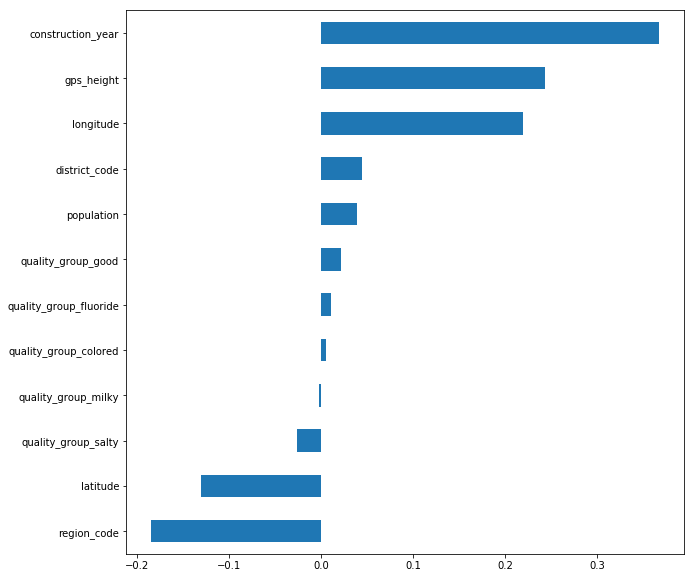

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
coefficients.sort_values().plot.barh();

## Submit to predictive modeling competition

In [0]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)

In [67]:
all(X_test_encoded.columns == X_train_encoded.columns)

True

In [68]:
X_test_encoded.columns, X_train_encoded.columns

(Index(['quality_group_good', 'quality_group_salty', 'quality_group_milky',
        'quality_group_colored', 'quality_group_fluoride', 'gps_height',
        'longitude', 'latitude', 'region_code', 'district_code', 'population',
        'construction_year'],
       dtype='object'),
 Index(['quality_group_good', 'quality_group_salty', 'quality_group_milky',
        'quality_group_colored', 'quality_group_fluoride', 'gps_height',
        'longitude', 'latitude', 'region_code', 'district_code', 'population',
        'construction_year'],
       dtype='object'))

In [0]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-02.csv', index=False)

In [0]:
from google.colab import files
files.download('submission-02.csv')